<font size="+2" color="black"><b>COMP5541 Machine Learning Project Group 51</b></font>

<font color="grey">Importing required libraries and files</font>

In [146]:
# Importing numpy and pandas
import numpy as np
import pandas as pd


# List input files
import os
for dirname, _, filenames in os.walk('kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


kaggle/input/.DS_Store
kaggle/input/home-data-for-ml-course/test.csv.gz
kaggle/input/home-data-for-ml-course/sample_submission.csv.gz
kaggle/input/home-data-for-ml-course/test.csv
kaggle/input/home-data-for-ml-course/data_description.txt
kaggle/input/home-data-for-ml-course/train.csv
kaggle/input/home-data-for-ml-course/train.csv.gz
kaggle/input/home-data-for-ml-course/sample_submission.csv


<font size="+1" color="green"><b>Loading Data</b></font>

<font color="grey">Loading train and test dataset</font>

In [147]:
train = pd.read_csv('kaggle/input/home-data-for-ml-course/train.csv')
test = pd.read_csv('kaggle/input/home-data-for-ml-course/test.csv')


print("Train dataset shape:", train.shape)
print("Test dataset shape:", test.shape)

Train dataset shape: (1460, 81)
Test dataset shape: (1459, 80)


In [148]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [149]:
train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [150]:
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [151]:
test.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
count,1459.000000,1459.000000,1232.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1444.000000,1458.000000,...,1458.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000
mean,2190.000000,57.378341,68.580357,9819.161069,6.078821,5.553804,1971.357779,1983.662783,100.709141,439.203704,...,472.768861,93.174777,48.313914,24.243317,1.794380,17.064428,1.744345,58.167923,6.104181,2007.769705
std,421.321334,42.746880,22.376841,4955.517327,1.436812,1.113740,30.390071,21.130467,177.625900,455.268042,...,217.048611,127.744882,68.883364,67.227765,20.207842,56.609763,30.491646,630.806978,2.722432,1.301740
min,1461.000000,20.000000,21.000000,1470.000000,1.000000,1.000000,1879.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000
25%,1825.500000,20.000000,58.000000,7391.000000,5.000000,5.000000,1953.000000,1963.000000,0.000000,0.000000,...,318.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000
50%,2190.000000,50.000000,67.000000,9399.000000,6.000000,5.000000,1973.000000,1992.000000,0.000000,350.500000,...,480.000000,0.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000
75%,2554.500000,70.000000,80.000000,11517.500000,7.000000,6.000000,2001.000000,2004.000000,164.000000,753.500000,...,576.000000,168.000000,72.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000
max,2919.000000,190.000000,200.000000,56600.000000,10.000000,9.000000,2010.000000,2010.000000,1290.000000,4010.000000,...,1488.000000,1424.000000,742.000000,1012.000000,360.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000


In [152]:
# Using python's inbuilt function `open()` to read text data

data_description = open("kaggle/input/home-data-for-ml-course/data_description.txt", "r")
print(data_description.read())

MSSubClass: Identifies the type of dwelling involved in the sale.	

        20	1-STORY 1946 & NEWER ALL STYLES
        30	1-STORY 1945 & OLDER
        40	1-STORY W/FINISHED ATTIC ALL AGES
        45	1-1/2 STORY - UNFINISHED ALL AGES
        50	1-1/2 STORY FINISHED ALL AGES
        60	2-STORY 1946 & NEWER
        70	2-STORY 1945 & OLDER
        75	2-1/2 STORY ALL AGES
        80	SPLIT OR MULTI-LEVEL
        85	SPLIT FOYER
        90	DUPLEX - ALL STYLES AND AGES
       120	1-STORY PUD (Planned Unit Development) - 1946 & NEWER
       150	1-1/2 STORY PUD - ALL AGES
       160	2-STORY PUD - 1946 & NEWER
       180	PUD - MULTILEVEL - INCL SPLIT LEV/FOYER
       190	2 FAMILY CONVERSION - ALL STYLES AND AGES

MSZoning: Identifies the general zoning classification of the sale.
		
       A	Agriculture
       C	Commercial
       FV	Floating Village Residential
       I	Industrial
       RH	Residential High Density
       RL	Residential Low Density
       RP	Residential Low Density Park 
       RM

<font size="+1" color="green"><b>Feature Engineering</b></font>

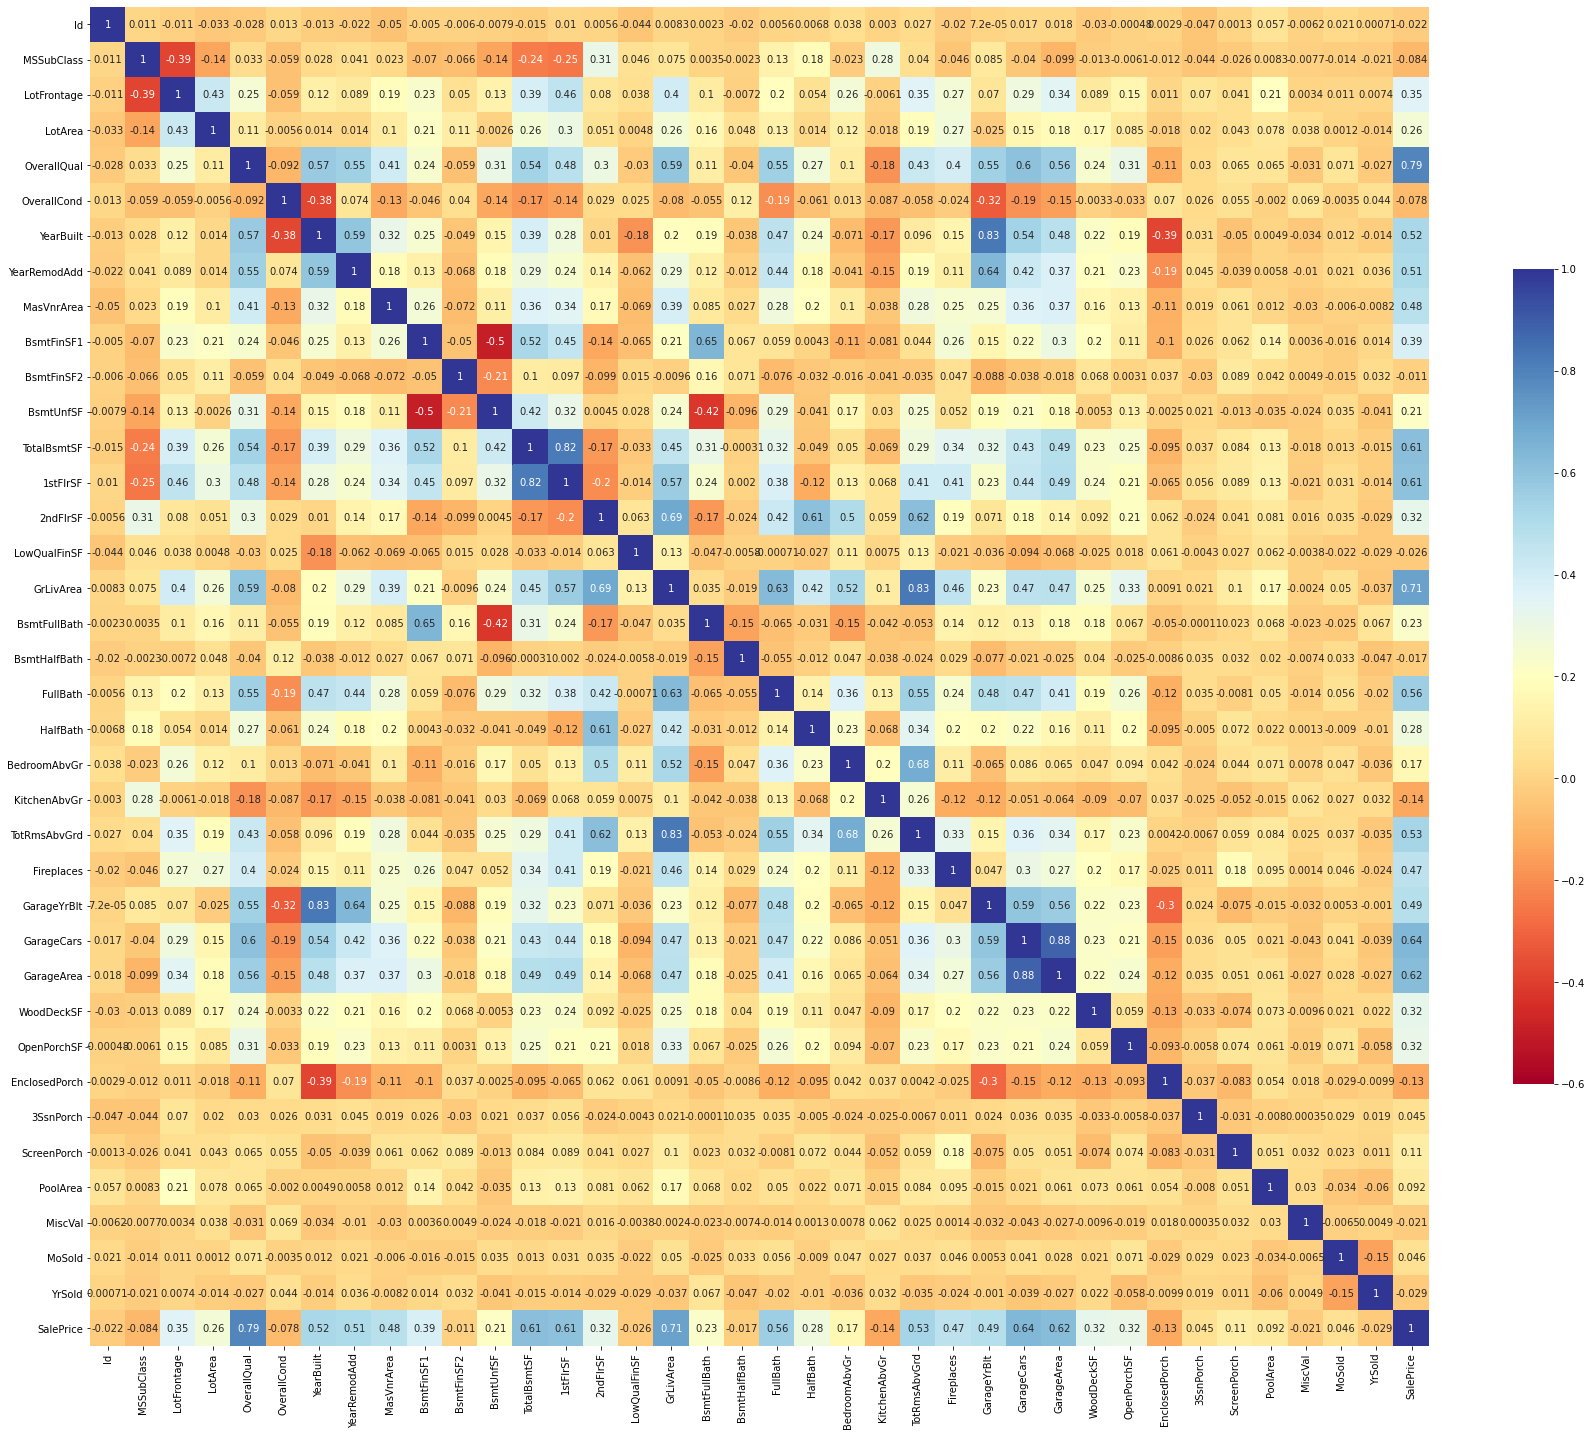

In [153]:
# print out the correlation matrix

corr = train.corr()
plt.subplots(figsize=(30, 30))
cmap = sns.diverging_palette(150, 250, as_cmap=True)
sns.heatmap(corr, cmap="RdYlBu", vmax=1, vmin=-0.6, center=0.2, square=True, linewidths=0, cbar_kws={"shrink": .5}, annot = True);

Checking missing values in train dataset

In [154]:
# Checking missing values in train dataset

train.isnull().sum().sort_values(ascending=False)

PoolQC           1453
MiscFeature      1406
Alley            1369
Fence            1179
FireplaceQu       690
                 ... 
CentralAir          0
SaleCondition       0
Heating             0
TotalBsmtSF         0
Id                  0
Length: 81, dtype: int64

Checking missing values in test dataset

In [155]:
# Checking missing values in test dataset

test.isnull().sum().sort_values(ascending=False)

PoolQC         1456
MiscFeature    1408
Alley          1352
Fence          1169
FireplaceQu     730
               ... 
Electrical        0
CentralAir        0
HeatingQC         0
Foundation        0
Id                0
Length: 80, dtype: int64

Base on the correlation matrix, we choose features with relatively high correlation coefficient 

In [156]:
# List of columns that we are going to keep

#features = ['Id', 'OverallQual', 'GrLivArea', '1stFlrSF', '2ndFlrSF', 'YearBuilt', 'LotArea', 'YearRemodAdd', 'OverallCond', 'Fireplaces']
features = ['Id', 'OverallQual', 'GrLivArea', 'GarageCars',  'GarageArea',  'TotalBsmtSF',  '1stFlrSF',  'FullBath',  'TotRmsAbvGrd',  'Fireplaces', 'BsmtFinSF1',  'LotFrontage', 'WoodDeckSF', 'OpenPorchSF', '2ndFlrSF','YearBuilt']

#print(train.isnull().any())
#train.columns[train.isnull().any()]
#print(train['OverallQual'].isnull().sum)



In [157]:
# 

print("Before:")

print(np.any(np.isnan(train['OverallQual'])))
print(np.any(np.isnan(train['GrLivArea'])))
print(np.any(np.isnan(train['GarageCars'])))
print(np.any(np.isnan(train['GarageArea'])))
print(np.any(np.isnan(train['TotalBsmtSF'])))
print(np.any(np.isnan(train['1stFlrSF'])))
print(np.any(np.isnan(train['FullBath'])))
print(np.any(np.isnan(train['TotRmsAbvGrd'])))
print(np.any(np.isnan(train['Fireplaces'])))
print(np.any(np.isnan(train['BsmtFinSF1'])))
print(np.any(np.isnan(train['LotFrontage'])))
print(np.any(np.isnan(train['WoodDeckSF'])))
print(np.any(np.isnan(train['OpenPorchSF'])))
print(np.any(np.isnan(train['2ndFlrSF'])))
print(np.any(np.isnan(train['YearBuilt'])))




train["LotFrontage"] = train.groupby("Neighborhood")["LotFrontage"].transform(lambda x: x.fillna(x.median()))

for col in ("GarageCars", "GarageArea", "TotalBsmtSF", "BsmtFinSF1"):
    train[col] = train[col].fillna(0)
print("Missing values in numeric fields are filled")



print("After:")

print(np.any(np.isnan(train['OverallQual'])))
print(np.any(np.isnan(train['GrLivArea'])))
print(np.any(np.isnan(train['GarageCars'])))
print(np.any(np.isnan(train['GarageArea'])))
print(np.any(np.isnan(train['TotalBsmtSF'])))
print(np.any(np.isnan(train['1stFlrSF'])))
print(np.any(np.isnan(train['FullBath'])))
print(np.any(np.isnan(train['TotRmsAbvGrd'])))
print(np.any(np.isnan(train['Fireplaces'])))
print(np.any(np.isnan(train['BsmtFinSF1'])))
print(np.any(np.isnan(train['LotFrontage'])))
print(np.any(np.isnan(train['WoodDeckSF'])))
print(np.any(np.isnan(train['OpenPorchSF'])))
print(np.any(np.isnan(train['YearBuilt'])))

False
False
False
False
False
False
False
False
False
False
True
False
False
False
False
---
'0' - treated...
False
False
False
False
False
False
False
False
False
False
False
False
False
False


In [158]:
print("Before:")

print(np.any(np.isnan(test['OverallQual'])))
print(np.any(np.isnan(test['GrLivArea'])))
print(np.any(np.isnan(test['GarageCars'])))
print(np.any(np.isnan(test['GarageArea'])))
print(np.any(np.isnan(test['TotalBsmtSF'])))
print(np.any(np.isnan(test['1stFlrSF'])))
print(np.any(np.isnan(test['FullBath'])))
print(np.any(np.isnan(test['TotRmsAbvGrd'])))
print(np.any(np.isnan(test['Fireplaces'])))
print(np.any(np.isnan(test['BsmtFinSF1'])))
print(np.any(np.isnan(test['LotFrontage'])))
print(np.any(np.isnan(test['WoodDeckSF'])))
print(np.any(np.isnan(test['OpenPorchSF'])))
print(np.any(np.isnan(test['2ndFlrSF'])))
print(np.any(np.isnan(test['YearBuilt'])))




test["LotFrontage"] = test.groupby("Neighborhood")["LotFrontage"].transform(lambda x: x.fillna(x.median()))

for col in ("GarageCars", "GarageArea", "TotalBsmtSF", "BsmtFinSF1"):
    test[col] = test[col].fillna(0)

print("Missing values in numeric fields are filled")

print("After:")
print(np.any(np.isnan(test['OverallQual'])))
print(np.any(np.isnan(test['GrLivArea'])))
print(np.any(np.isnan(test['GarageCars'])))
print(np.any(np.isnan(test['GarageArea'])))
print(np.any(np.isnan(test['TotalBsmtSF'])))
print(np.any(np.isnan(test['1stFlrSF'])))
print(np.any(np.isnan(test['FullBath'])))
print(np.any(np.isnan(test['TotRmsAbvGrd'])))
print(np.any(np.isnan(test['Fireplaces'])))
print(np.any(np.isnan(test['BsmtFinSF1'])))
print(np.any(np.isnan(test['LotFrontage'])))
print(np.any(np.isnan(test['WoodDeckSF'])))
print(np.any(np.isnan(test['OpenPorchSF'])))
print(np.any(np.isnan(test['2ndFlrSF'])))
print(np.any(np.isnan(test['YearBuilt'])))

False
False
True
True
True
False
False
False
False
True
True
False
False
False
False
---
'0' - treated...
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False


<font color="grey">Store SalePrice for training purpose</font>

In [159]:
Saleprice = train['SalePrice']

<font color="grey">Store required features to X and test</font>

In [160]:
# Storing reduced train dataset to a variable called 'X'
X = train[features]

# Reducing test dataset to only containing the list of features
test = test[features]

<font size="+1" color="green"><b>Model training</b></font>

In [161]:
Saleprice

0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: SalePrice, Length: 1460, dtype: int64

In [162]:
# Importing Library for Plotting
import matplotlib.pyplot as plt
import seaborn as sns

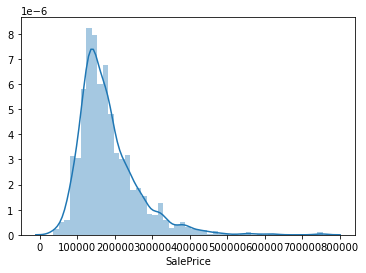

In [163]:
# Plotting SalePrice column

sns.distplot(Saleprice)

In [164]:
# normalization
Saleprice = np.log(Saleprice)

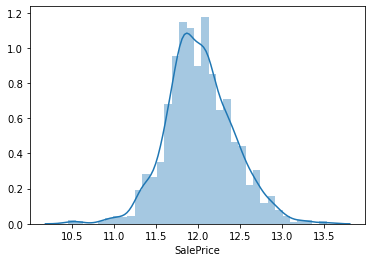

In [165]:
sns.distplot(Saleprice)

Import required libraries for related models

In [166]:
#split to train data and validation data

from sklearn.linear_model import LinearRegression, Ridge, RidgeCV

from sklearn.ensemble import RandomForestRegressor

from sklearn.model_selection import train_test_split

from xgboost import XGBRegressor



((1022, 16), (438, 16), (1022,), (438,))

Spliting training data to two sets for training and validation purpose

In [ ]:
X_train,X_vali,Y_train,Y_vali = train_test_split(X,Saleprice,test_size = 0.3,random_state= 0)

X_train.shape,X_vali.shape,Y_train.shape,Y_vali.shape

In [167]:
#train with different models

lm = LinearRegression()

lm.fit(X_train,Y_train)

rdgCV = RidgeCV(alphas=[0.01,0.1,1,10,100,1000], cv=5)

rdgCV.fit(X_train,Y_train)

rdg = Ridge(alpha=10)

rdg.fit(X_train, Y_train)

rfr = RandomForestRegressor(n_jobs=-1, n_estimators=100)

rfr.fit(X_train,Y_train)

xgb = XGBRegressor()

xgb.fit(X_train, Y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [168]:
#print out the training & validation score

print('—–training score —')

print("LinearRegression:", lm.score(X_train, Y_train))
print("LinearRegression rdg:", rdg.score(X_train, Y_train))
print("LinearRegression rdgCV:", rdgCV.score(X_train, Y_train))
print("RandomForestRegressor rfr:", rfr.score(X_train, Y_train))
print("XGBRegressor xgb:", xgb.score(X_train, Y_train))

print()

print('—-Validation score —')
print("LinearRegression:", lm.score(X_vali, Y_vali))
print("LinearRegression rdg:", rdg.score(X_vali, Y_vali))
print("LinearRegression rdgCV:", rdgCV.score(X_vali, Y_vali))
print("RandomForestRegressor rfr:", rfr.score(X_vali, Y_vali))
print("XGBRegressor xgb:", xgb.score(X_vali, Y_vali))

—–training score —
LinearRegression: 0.8509159050638846
LinearRegression rdg: 0.8508992543626904
LinearRegression rdgCV: 0.8508992543626904
RandomForestRegressor rfr: 0.978693677204241
XGBRegressor xgb: 0.9994007298426965

—-Validation score —
LinearRegression: 0.7460762366751494
LinearRegression rdg: 0.7450770926375057
LinearRegression rdgCV: 0.7450770926375057
RandomForestRegressor rfr: 0.8670522280993924
XGBRegressor xgb: 0.8669877449570836


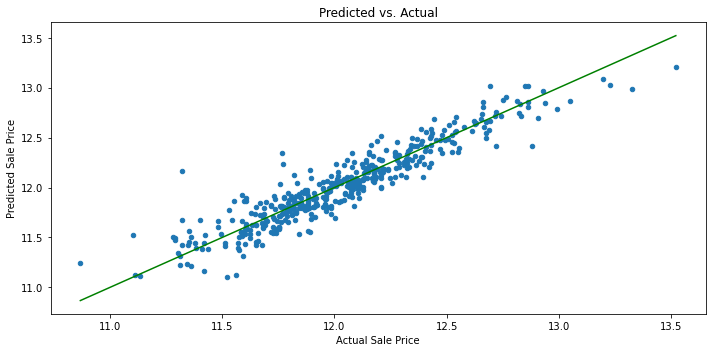

In [169]:
from matplotlib import pyplot as plt

import matplotlib

%matplotlib inline

clf = XGBRegressor()

clf.fit(X_train, Y_train)

y_pred = clf.predict(X_vali)

plt.figure(figsize=(10, 5))

plt.scatter(Y_vali, y_pred, s=20)

plt.title('Predicted vs. Actual')

plt.xlabel('Actual Sale Price')

plt.ylabel('Predicted Sale Price')

plt.plot([min(Y_vali), max(Y_vali)], [min(Y_vali), max(Y_vali)], color='green')

plt.tight_layout()

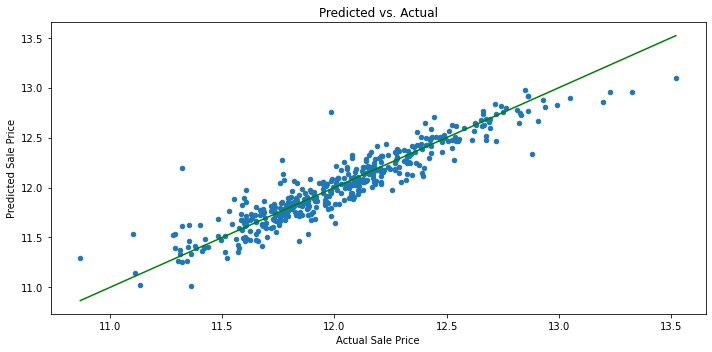

In [170]:
from matplotlib import pyplot as plt

import matplotlib

%matplotlib inline

clf = RandomForestRegressor(n_estimators=500, n_jobs=-1)

clf.fit(X_train, Y_train)

y_pred = clf.predict(X_vali)

plt.figure(figsize=(10, 5))

plt.scatter(Y_vali, y_pred, s=20)

plt.title('Predicted vs. Actual')

plt.xlabel('Actual Sale Price')

plt.ylabel('Predicted Sale Price')

plt.plot([min(Y_vali), max(Y_vali)], [min(Y_vali), max(Y_vali)], color='green')

plt.tight_layout()

In [171]:
# Importing XGBoost
from xgboost import XGBRegressor

# Creating XGBoost model
xgb = XGBRegressor()

In [172]:
xgb.fit(X, Saleprice)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [173]:
test['SalePrice'] = xgb.predict(test) 

In [174]:
test[['Id', 'SalePrice']].to_csv('submission_xgb.csv', index = False)
test = test[features]

In [175]:
clf.fit(X, Saleprice)

RandomForestRegressor(n_estimators=500, n_jobs=-1)

In [176]:
test['SalePrice'] = clf.predict(test) 

In [177]:
test[['Id', 'SalePrice']].to_csv('submission_clf.csv', index = False)
test = test[features]